In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [3]:
test_sizes = [1,5,10,25,50,75,90,100,104]

In [10]:
def tpr(sample,target_class=0):
    # Actual cases
    subset = np.where(sample[:,0]==target_class)[0]
    num_true = len(subset)
    num_false_negatives = len(np.where(sample[subset,1]!=target_class)[0])
    num_true_positives = num_true - num_false_negatives
    # Uncomment to print the counts...
    # print(num_true,num_true_positives,num_false_negatives)

    # Cases we are not interested in
    subset = np.where(sample[:,0]!=target_class)[0]
    num_false = len(subset)
    num_true_negatives = len(np.where(sample[subset,1]!=target_class)[0])
    num_false_positives = num_false - num_true_negatives
    # Uncomment to print the counts
    # print(num_false,num_false_positives,num_true_negatives)

    # Definition of the false positive rate (want this to be low)
    try:
        true_positive_ratio = float(num_true_positives) / (float(num_true_positives) + float(num_false_negatives))
    except:
        true_positive_ratio = 1.0
    return true_positive_ratio * 100.0

# Runs the FPR calculation on -each- random
# sample - the average of these sample FPRs
# is the False Positive Rate
def calc_tpr(data,target_class=0,N=100):
    sample_size = int(data.shape[0] / N)
    nsamples = int(data.shape[0]/sample_size)
    return [tpr(data[s*sample_size:(s*sample_size)+sample_size,:],target_class) for s in range(0,nsamples)]

In [11]:
# Single data set example - N=100 (2500 lines in the file)
np.mean(calc_tpr(np.loadtxt("cancer-results-25.txt")))

78.2241341991342

In [12]:
tprs = np.array([calc_tpr(np.loadtxt("cancer-results-%d.txt"%x)) for x in test_sizes]).transpose()

In [13]:
means = np.mean(tprs,0)
means

array([95.        , 87.33333333, 79.33333333, 78.2241342 , 81.24701965,
       80.62856312, 70.9499312 , 45.63684211, 18.        ])

In [14]:
stderr = np.std(tprs,0) / np.sqrt(100)
stderr

array([2.17944947, 3.06521705, 3.03562185, 2.04306101, 1.52665696,
       1.62715182, 2.76113519, 4.0285188 , 3.84187454])

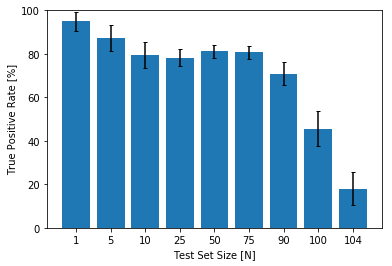

In [17]:
plt.bar([str(x) for x in test_sizes],means,yerr=1.96*stderr,capsize=2)
plt.ylim(0,100)
plt.xlabel("Test Set Size [N]")
plt.ylabel("True Positive Rate [%]")
plt.show()